In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading and Collating Data

In [2]:
for file in os.listdir("data"):
    print(file)

tuesday.csv
monday.csv
thursday.csv
wednesday.csv
friday.csv
aggregated
positions.json


In [3]:
df_list = []

for file in os.listdir("data"):
    if file.endswith(".csv"):
        df = pd.read_csv('./data/{}'.format(file), parse_dates=True, sep=';', index_col='timestamp')
        df_list.append(df)

df = pd.concat(df_list, sort=True)

In [4]:
df.head()

,customer_no,location
timestamp,,
2019-09-03 07:02:00,1,fruit
2019-09-03 07:02:00,2,drinks
2019-09-03 07:03:00,3,dairy
2019-09-03 07:05:00,1,drinks
2019-09-03 07:06:00,4,dairy


In [5]:
df.shape

(24877, 2)

In [6]:
print(df.index.min(), df.index.max())

2019-09-02 07:03:00 2019-09-06 21:50:00


In [7]:
# supermarket closing time

closing_time = df.index.max().time()

print(closing_time)


21:50:00


## 2. Set Distinct ID for each customer and check that every customer has a checkout row

In [8]:
# add columns for day and time 

df["time"] = df.index.time
df["day"] = df.index.day_name()
df['date'] = df.index.date
df.head()

,customer_no,location,time,day,date
timestamp,,,,,
2019-09-03 07:02:00,1,fruit,07:02:00,Tuesday,2019-09-03
2019-09-03 07:02:00,2,drinks,07:02:00,Tuesday,2019-09-03
2019-09-03 07:03:00,3,dairy,07:03:00,Tuesday,2019-09-03
2019-09-03 07:05:00,1,drinks,07:05:00,Tuesday,2019-09-03
2019-09-03 07:06:00,4,dairy,07:06:00,Tuesday,2019-09-03


In [9]:
# add customer unique id as day + customer no

df['customer_id'] = df['day'] + '_' + df['customer_no'].astype(str)

df['customer_id'] = df['customer_id'].str.lower()
df['day'] = df['day'].str.lower()

df.head()

,customer_no,location,time,day,date,customer_id
timestamp,,,,,,
2019-09-03 07:02:00,1,fruit,07:02:00,tuesday,2019-09-03,tuesday_1
2019-09-03 07:02:00,2,drinks,07:02:00,tuesday,2019-09-03,tuesday_2
2019-09-03 07:03:00,3,dairy,07:03:00,tuesday,2019-09-03,tuesday_3
2019-09-03 07:05:00,1,drinks,07:05:00,tuesday,2019-09-03,tuesday_1
2019-09-03 07:06:00,4,dairy,07:06:00,tuesday,2019-09-03,tuesday_4


In [10]:
test_df = df[df['customer_id']=='tuesday_1'].copy()

In [11]:
def add_missing_customer_checkout(df):
    
    
    customer_ids = df['customer_id'].unique()
    for id in customer_ids:
        customer_df = df[df['customer_id']==id]
        
        if 'checkout' in customer_df['location'].values:
            pass
        else:
            checkout_dict = {'customer_no':np.nan, 'location':'checkout', 
                             'time':closing_time, 'day':np.nan, 'customer_id':id}
            print(id)
            df = df.append(checkout_dict, ignore_index=True)
    
    return df

In [12]:
df.head()

,customer_no,location,time,day,date,customer_id
timestamp,,,,,,
2019-09-03 07:02:00,1,fruit,07:02:00,tuesday,2019-09-03,tuesday_1
2019-09-03 07:02:00,2,drinks,07:02:00,tuesday,2019-09-03,tuesday_2
2019-09-03 07:03:00,3,dairy,07:03:00,tuesday,2019-09-03,tuesday_3
2019-09-03 07:05:00,1,drinks,07:05:00,tuesday,2019-09-03,tuesday_1
2019-09-03 07:06:00,4,dairy,07:06:00,tuesday,2019-09-03,tuesday_4


In [13]:

full_df = add_missing_customer_checkout(df)

tuesday_1411
tuesday_1422
monday_1430
monday_1433
monday_1437
monday_1439
monday_1440
monday_1441
monday_1443
monday_1445
monday_1446
monday_1447
thursday_1527
thursday_1532
thursday_1533
wednesday_1520
wednesday_1527
wednesday_1528
wednesday_1529
wednesday_1530
friday_1494
friday_1496
friday_1500
friday_1503
friday_1505
friday_1506
friday_1509
friday_1510


In [14]:
full_df.head()

,customer_no,location,time,day,date,customer_id
0,1.0,fruit,07:02:00,tuesday,2019-09-03,tuesday_1
1,2.0,drinks,07:02:00,tuesday,2019-09-03,tuesday_2
2,3.0,dairy,07:03:00,tuesday,2019-09-03,tuesday_3
3,1.0,drinks,07:05:00,tuesday,2019-09-03,tuesday_1
4,4.0,dairy,07:06:00,tuesday,2019-09-03,tuesday_4


In [15]:
full_df[full_df['customer_id']=='friday_1503']

,customer_no,location,time,day,date,customer_id
24858,1503.0,dairy,21:47:00,friday,2019-09-06,friday_1503
24869,1503.0,drinks,21:49:00,friday,2019-09-06,friday_1503
24900,NaN,checkout,21:50:00,NaN,NaN,friday_1503


In [16]:
full_df.isna().sum()

customer_no    28
location        0
time            0
day            28
date           28
customer_id     0
dtype: int64

In [17]:
# fill missing values in each column using forward fill

full_df = full_df.sort_values(by=['customer_id', 'time']).fillna(method='ffill')

full_df.isna().sum()

customer_no    0
location       0
time           0
day            0
date           0
customer_id    0
dtype: int64

In [18]:
full_df[full_df['customer_id']=='friday_1503']

,customer_no,location,time,day,date,customer_id
24858,1503.0,dairy,21:47:00,friday,2019-09-06,friday_1503
24869,1503.0,drinks,21:49:00,friday,2019-09-06,friday_1503
24900,1503.0,checkout,21:50:00,friday,2019-09-06,friday_1503


In [19]:
# convert customer id to int

full_df['customer_no'] = full_df['customer_no'].astype(int)

# construct back datetime stamp from date and time

full_df['datetime'] = pd.to_datetime(full_df['date'].astype(str) + ' ' + full_df['time'].astype(str))

full_df.head()

,customer_no,location,time,day,date,customer_id,datetime
19752,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00
19764,1,spices,07:04:00,friday,2019-09-06,friday_1,2019-09-06 07:04:00
19767,1,checkout,07:05:00,friday,2019-09-06,friday_1,2019-09-06 07:05:00
19771,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00
19792,10,checkout,07:11:00,friday,2019-09-06,friday_10,2019-09-06 07:11:00


## 3. Create section order


In [20]:
# creating enter datetime for all customer ids

full_df.reset_index(inplace=True, drop=True)

full_df['enter_time'] = full_df.groupby('customer_id')['datetime'].transform('min')

full_df.head()

,customer_no,location,time,day,date,customer_id,datetime,enter_time
0,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:00:00
1,1,spices,07:04:00,friday,2019-09-06,friday_1,2019-09-06 07:04:00,2019-09-06 07:00:00
2,1,checkout,07:05:00,friday,2019-09-06,friday_1,2019-09-06 07:05:00,2019-09-06 07:00:00
3,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:06:00
4,10,checkout,07:11:00,friday,2019-09-06,friday_10,2019-09-06 07:11:00,2019-09-06 07:06:00


In [21]:
# creating exit datetime for all customer ids

full_df['exit_time'] = full_df.groupby('customer_id')['datetime'].transform('max')

In [22]:
# check

full_df[full_df['customer_id']=='tuesday_1'].sort_values('time')

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time
15134,1,fruit,07:02:00,tuesday,2019-09-03,tuesday_1,2019-09-03 07:02:00,2019-09-03 07:02:00,2019-09-03 07:12:00
15135,1,drinks,07:05:00,tuesday,2019-09-03,tuesday_1,2019-09-03 07:05:00,2019-09-03 07:02:00,2019-09-03 07:12:00
15136,1,checkout,07:12:00,tuesday,2019-09-03,tuesday_1,2019-09-03 07:12:00,2019-09-03 07:02:00,2019-09-03 07:12:00


In [23]:
# calculating time spent in the supermarket by each customer


full_df['total_time_spent'] = full_df['exit_time'] - full_df['enter_time']

def time_delta_min(time_delta):
    return time_delta.total_seconds()/60

full_df['total_time_spent'] = full_df['total_time_spent'].apply(time_delta_min).astype(int)

full_df.head()

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time,total_time_spent
0,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5
1,1,spices,07:04:00,friday,2019-09-06,friday_1,2019-09-06 07:04:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5
2,1,checkout,07:05:00,friday,2019-09-06,friday_1,2019-09-06 07:05:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5
3,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5
4,10,checkout,07:11:00,friday,2019-09-06,friday_10,2019-09-06 07:11:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5


In [24]:
# if datetime = enter_datetime == first location 

full_df['section_order'] = np.nan

full_df.loc[full_df['datetime']==full_df['enter_time'], 'section_order'] = 'first'


In [25]:
full_df.head()

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time,total_time_spent,section_order
0,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,first
1,1,spices,07:04:00,friday,2019-09-06,friday_1,2019-09-06 07:04:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,NaN
2,1,checkout,07:05:00,friday,2019-09-06,friday_1,2019-09-06 07:05:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,NaN
3,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5,first
4,10,checkout,07:11:00,friday,2019-09-06,friday_10,2019-09-06 07:11:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5,NaN


In [26]:
# if location = checkout, then order is checkout

full_df.loc[full_df['location']=='checkout', 'section_order'] = 'checkout'

In [27]:
# any in between location set to following

full_df['section_order'].fillna('following', inplace=True)

In [28]:
full_df.head()

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time,total_time_spent,section_order
0,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,first
1,1,spices,07:04:00,friday,2019-09-06,friday_1,2019-09-06 07:04:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,following
2,1,checkout,07:05:00,friday,2019-09-06,friday_1,2019-09-06 07:05:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,checkout
3,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5,first
4,10,checkout,07:11:00,friday,2019-09-06,friday_10,2019-09-06 07:11:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5,checkout


In [29]:
# check

full_df[full_df['customer_id']=='tuesday_4'].sort_values('time')

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time,total_time_spent,section_order
17694,4,dairy,07:06:00,tuesday,2019-09-03,tuesday_4,2019-09-03 07:06:00,2019-09-03 07:06:00,2019-09-03 07:12:00,6,first
17695,4,spices,07:08:00,tuesday,2019-09-03,tuesday_4,2019-09-03 07:08:00,2019-09-03 07:06:00,2019-09-03 07:12:00,6,following
17696,4,drinks,07:09:00,tuesday,2019-09-03,tuesday_4,2019-09-03 07:09:00,2019-09-03 07:06:00,2019-09-03 07:12:00,6,following
17697,4,checkout,07:12:00,tuesday,2019-09-03,tuesday_4,2019-09-03 07:12:00,2019-09-03 07:06:00,2019-09-03 07:12:00,6,checkout


## 4. Calculate probability of the first section

In [30]:
first_section_df = full_df.loc[full_df['section_order']=='first']

first_section_df.head()

,customer_no,location,time,day,date,customer_id,datetime,enter_time,exit_time,total_time_spent,section_order
0,1,dairy,07:00:00,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:00:00,2019-09-06 07:05:00,5,first
3,10,fruit,07:06:00,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:06:00,2019-09-06 07:11:00,5,first
5,100,fruit,08:03:00,friday,2019-09-06,friday_100,2019-09-06 08:03:00,2019-09-06 08:03:00,2019-09-06 08:04:00,1,first
7,1000,fruit,17:19:00,friday,2019-09-06,friday_1000,2019-09-06 17:19:00,2019-09-06 17:19:00,2019-09-06 17:20:00,1,first
9,1001,fruit,17:19:00,friday,2019-09-06,friday_1001,2019-09-06 17:19:00,2019-09-06 17:19:00,2019-09-06 17:29:00,10,first


In [31]:
# calculate probabilities

print(first_section_df['location'].value_counts())

first_section_probs = first_section_df['location'].value_counts(normalize=True)

print(first_section_probs)

fruit     2810
dairy     2141
spices    1351
drinks    1143
Name: location, dtype: int64
fruit     0.377435
dairy     0.287576
spices    0.181464
drinks    0.153526
Name: location, dtype: float64


## 5. Calculate absolute total number of customers who visited every section

In [32]:
customers_per_section = full_df.groupby('location')['customer_id'].count()

customers_per_section.sort_values(ascending=False)

location
checkout    7445
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: customer_id, dtype: int64

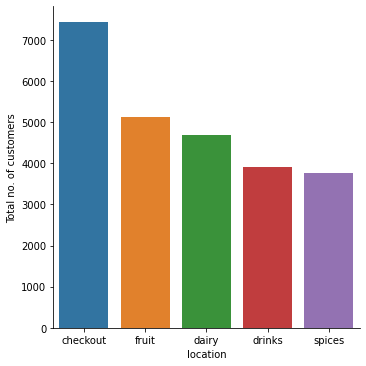

In [33]:
# plot

sns.catplot(data=full_df, kind='count', x='location', order=['checkout', 'fruit', 'dairy', 'drinks', 'spices']);

plt.ylabel("Total no. of customers");

## 6. Plot the distribution of the total time spent by customers in the supermarket

In [34]:
time_spent_by_customer = full_df.groupby('customer_id')['total_time_spent'].first()

In [35]:
time_spent_by_customer = time_spent_by_customer.to_frame()

time_spent_by_customer.head()

,total_time_spent
customer_id,
friday_1,5
friday_10,5
friday_100,1
friday_1000,1
friday_1001,10


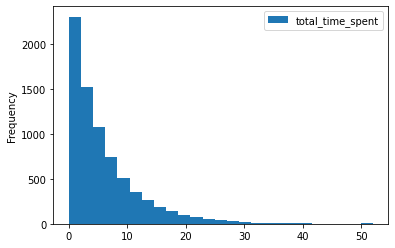

In [36]:
time_spent_by_customer.plot.hist(bins=25);

## 7. Plot the number of customers at each loaction over time

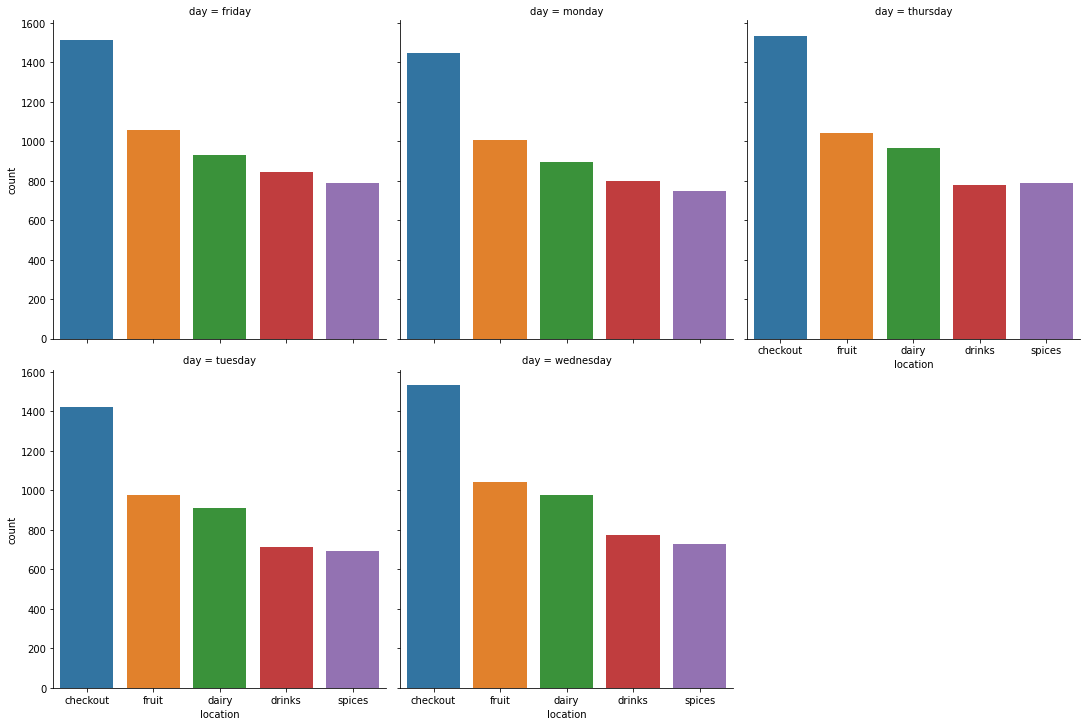

In [37]:
# we can plot by day first

sns.catplot(data=full_df, kind='count', col='day', x='location', 
            order=['checkout', 'fruit', 'dairy', 'drinks', 'spices'], col_wrap=3);

In [38]:
customers_byday_time = full_df.groupby(['day', 'datetime', 'location'])['customer_id'].count()

customers_byday_time = customers_byday_time.to_frame().reset_index()



customers_byday_time['time'] =  pd.to_datetime(customers_byday_time['datetime']).dt.strftime('%H:%M:%S')
customers_byday_time.head()

,day,datetime,location,customer_id,time
0,friday,2019-09-06 07:00:00,dairy,1,07:00:00
1,friday,2019-09-06 07:00:00,drinks,1,07:00:00
2,friday,2019-09-06 07:00:00,fruit,1,07:00:00
3,friday,2019-09-06 07:01:00,checkout,1,07:01:00
4,friday,2019-09-06 07:01:00,dairy,1,07:01:00


In [39]:
friday_fruit = customers_byday_time.loc[(customers_byday_time['day']=='friday') & (customers_byday_time['location']=='fruit')]
friday_fruit.head()


,day,datetime,location,customer_id,time
2,friday,2019-09-06 07:00:00,fruit,1,07:00:00
10,friday,2019-09-06 07:03:00,fruit,1,07:03:00
17,friday,2019-09-06 07:06:00,fruit,3,07:06:00
21,friday,2019-09-06 07:08:00,fruit,1,07:08:00
25,friday,2019-09-06 07:09:00,fruit,2,07:09:00


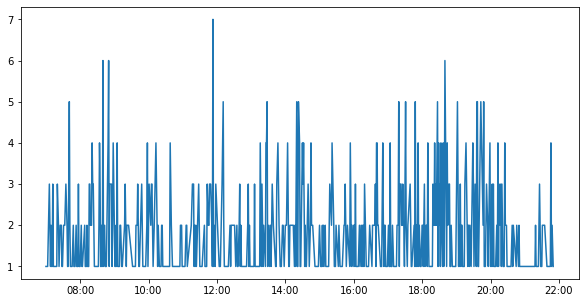

In [40]:
friday_fruit.set_index('datetime', inplace=True)

import matplotlib.dates as mdates

xfmt = mdates.DateFormatter('%H:%M')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(friday_fruit.index, friday_fruit['customer_id'])
ax.xaxis.set_major_formatter(xfmt)

plt.show()

In [41]:
# we can also sample on an hourly basis

friday_fruit.head()

,day,location,customer_id,time
datetime,,,,
2019-09-06 07:00:00,friday,fruit,1,07:00:00
2019-09-06 07:03:00,friday,fruit,1,07:03:00
2019-09-06 07:06:00,friday,fruit,3,07:06:00
2019-09-06 07:08:00,friday,fruit,1,07:08:00
2019-09-06 07:09:00,friday,fruit,2,07:09:00


In [42]:
friday_fruit_hourly = friday_fruit.resample(rule='H').sum()

In [43]:
friday_fruit_hourly.head()

,customer_id
datetime,
2019-09-06 07:00:00,64
2019-09-06 08:00:00,105
2019-09-06 09:00:00,54
2019-09-06 10:00:00,58
2019-09-06 11:00:00,63


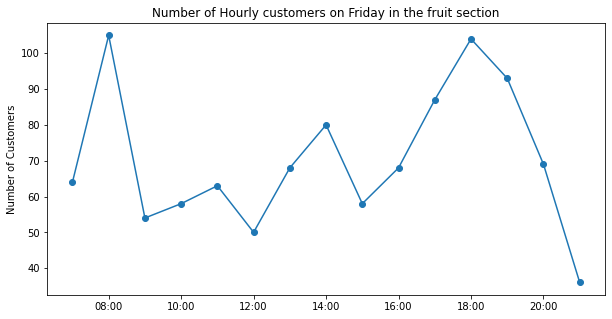

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(friday_fruit_hourly.index, friday_fruit_hourly['customer_id'], marker='o')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Number of Hourly customers on Friday in the fruit section')
plt.ylabel('Number of Customers')
plt.show()

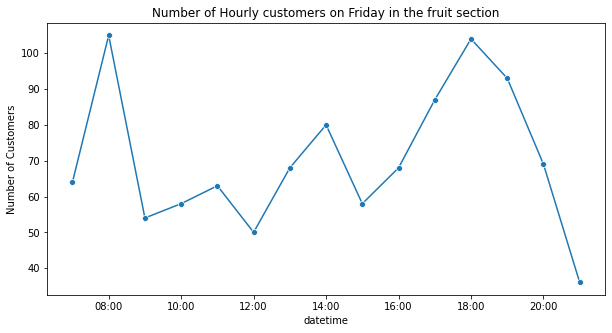

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=friday_fruit_hourly.index, y='customer_id', data=friday_fruit_hourly, marker='o')
ax.xaxis.set_major_formatter(xfmt)
plt.title('Number of Hourly customers on Friday in the fruit section')
plt.ylabel('Number of Customers')
plt.show()

In [46]:

customers_byday_time_hourly = customers_byday_time.groupby(['day', 'location']).resample(rule='H', on='datetime').sum()

customers_byday_time_hourly.head()

customer_id
day    location datetime                        
friday checkout 2019-09-06 07:00:00           87
                2019-09-06 08:00:00          132
                2019-09-06 09:00:00           82
                2019-09-06 10:00:00           80
                2019-09-06 11:00:00           79

In [47]:
# number of customers for a given day and a given location

customers_byday_time_hourly.loc['friday', 'checkout']

,customer_id
datetime,
2019-09-06 07:00:00,87
2019-09-06 08:00:00,132
2019-09-06 09:00:00,82
2019-09-06 10:00:00,80
2019-09-06 11:00:00,79
2019-09-06 12:00:00,90
2019-09-06 13:00:00,108
2019-09-06 14:00:00,108
2019-09-06 15:00:00,81


## 8. Changing the granularity of the data to minute by minute

In [48]:
example_df = full_df[full_df['customer_id']=='friday_102'].set_index('datetime', drop=True).drop('time', axis=1)

example_df

,customer_no,location,day,date,customer_id,enter_time,exit_time,total_time_spent,section_order
datetime,,,,,,,,,
2019-09-06 08:04:00,102,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,first
2019-09-06 08:06:00,102,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:13:00,102,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:21:00,102,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:23:00,102,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:24:00,102,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:26:00,102,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:31:00,102,drinks,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following
2019-09-06 08:33:00,102,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52,following


In [49]:
example_df.resample(rule='T').last().fillna(method='ffill')

,customer_no,location,day,date,customer_id,enter_time,exit_time,total_time_spent,section_order
datetime,,,,,,,,,
2019-09-06 08:04:00,102.0,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,first
2019-09-06 08:05:00,102.0,fruit,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,first
2019-09-06 08:06:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:07:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:08:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:09:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:10:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:11:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following
2019-09-06 08:12:00,102.0,dairy,friday,2019-09-06,friday_102,2019-09-06 08:04:00,2019-09-06 08:56:00,52.0,following


In [50]:
# let's apply to entire dataframe


full_df.set_index('datetime', inplace=True, drop=True)

full_df.drop('time', axis=1, inplace=True)

full_df.head()

,customer_no,location,day,date,customer_id,enter_time,exit_time,total_time_spent,section_order
datetime,,,,,,,,,
2019-09-06 07:00:00,1,dairy,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,5,first
2019-09-06 07:04:00,1,spices,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,5,following
2019-09-06 07:05:00,1,checkout,friday,2019-09-06,friday_1,2019-09-06 07:00:00,2019-09-06 07:05:00,5,checkout
2019-09-06 07:06:00,10,fruit,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:11:00,5,first
2019-09-06 07:11:00,10,checkout,friday,2019-09-06,friday_10,2019-09-06 07:06:00,2019-09-06 07:11:00,5,checkout


In [51]:
final_df = full_df.groupby('customer_id').resample(rule='T').last().fillna(method='ffill')

In [52]:
final_df.head(10)

customer_no  location     day        date  \
customer_id datetime                                                         
friday_1    2019-09-06 07:00:00          1.0     dairy  friday  2019-09-06   
            2019-09-06 07:01:00          1.0     dairy  friday  2019-09-06   
            2019-09-06 07:02:00          1.0     dairy  friday  2019-09-06   
            2019-09-06 07:03:00          1.0     dairy  friday  2019-09-06   
            2019-09-06 07:04:00          1.0    spices  friday  2019-09-06   
            2019-09-06 07:05:00          1.0  checkout  friday  2019-09-06   
friday_10   2019-09-06 07:06:00         10.0     fruit  friday  2019-09-06   
            2019-09-06 07:07:00         10.0     fruit  friday  2019-09-06   
            2019-09-06 07:08:00         10.0     fruit  friday  2019-09-06   
            2019-09-06 07:09:00         10.0     fruit  friday  2019-09-06   

                                customer_id          enter_time  \
customer_id datetime                                              
friday_1    2019-09-06 07:00:00    friday_1 2019-09-06 07:00:00   
            2019-09-06 07:01:00    friday_1 2019-09-06 07:00:00   
            2019-09-06 07:02:00    friday_1 2019-09-06 07:00:00   
            2019-09-06 07:03:00    friday_1 2019-09-06 07:00:00   
            2019-09-06 07:04:00    friday_1 2019-09-06 07:00:00   
            2019-09-06 07:05:00    friday_1 2019-09-06 07:00:00   
friday_10   2019-09-06 07:06:00   friday_10 2019-09-06 07:06:00   
            2019-09-06 07:07:00   friday_10 2019-09-06 07:06:00   
            2019-09-06 07:08:00   friday_10 2019-09-06 07:06:00   
            2019-09-06 07:09:00   friday_10 2019-09-06 07:06:00   

                                          exit_time  total_time_spent  \
customer_id datetime                                                    
friday_1    2019-09-06 07:00:00 2019-09-06 07:05:00               5.0   
            2019-09-06 07:01:00 2019-09-06 07:05:00               5.0   
            2019-09-06 07:02:00 2019-09-06 07:05:00               5.0   
            2019-09-06 07:03:00 2019-09-06 07:05:00               5.0   
            2019-09-06 07:04:00 2019-09-06 07:05:00               5.0   
            2019-09-06 07:05:00 2019-09-06 07:05:00               5.0   
friday_10   2019-09-06 07:06:00 2019-09-06 07:11:00               5.0   
            2019-09-06 07:07:00 2019-09-06 07:11:00               5.0   
            2019-09-06 07:08:00 2019-09-06 07:11:00               5.0   
            2019-09-06 07:09:00 2019-09-06 07:11:00               5.0   

                                section_order  
customer_id datetime                           
friday_1    2019-09-06 07:00:00         first  
            2019-09-06 07:01:00         first  
            2019-09-06 07:02:00         first  
            2019-09-06 07:03:00         first  
            2019-09-06 07:04:00     following  
            2019-09-06 07:05:00      checkout  
friday_10   2019-09-06 07:06:00         first  
            2019-09-06 07:07:00         first  
            2019-09-06 07:08:00         first  
            2019-09-06 07:09:00         first

In [53]:
# total time spent should be increased by 1 assuming a customer present at a certain minute spends the entire minute
# in the supermarket

final_df.drop('customer_id', axis=1, inplace=True)

final_df.reset_index(inplace=True)

final_df['total_time_spent'] = final_df['total_time_spent'] + 1

final_df.head()

,customer_id,datetime,customer_no,location,day,date,enter_time,exit_time,total_time_spent,section_order
0,friday_1,2019-09-06 07:00:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
1,friday_1,2019-09-06 07:01:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
2,friday_1,2019-09-06 07:02:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
3,friday_1,2019-09-06 07:03:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
4,friday_1,2019-09-06 07:04:00,1.0,spices,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,following


In [54]:
final_df.head(10)

,customer_id,datetime,customer_no,location,day,date,enter_time,exit_time,total_time_spent,section_order
0,friday_1,2019-09-06 07:00:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
1,friday_1,2019-09-06 07:01:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
2,friday_1,2019-09-06 07:02:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
3,friday_1,2019-09-06 07:03:00,1.0,dairy,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,first
4,friday_1,2019-09-06 07:04:00,1.0,spices,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,following
5,friday_1,2019-09-06 07:05:00,1.0,checkout,friday,2019-09-06,2019-09-06 07:00:00,2019-09-06 07:05:00,6.0,checkout
6,friday_10,2019-09-06 07:06:00,10.0,fruit,friday,2019-09-06,2019-09-06 07:06:00,2019-09-06 07:11:00,6.0,first
7,friday_10,2019-09-06 07:07:00,10.0,fruit,friday,2019-09-06,2019-09-06 07:06:00,2019-09-06 07:11:00,6.0,first
8,friday_10,2019-09-06 07:08:00,10.0,fruit,friday,2019-09-06,2019-09-06 07:06:00,2019-09-06 07:11:00,6.0,first
9,friday_10,2019-09-06 07:09:00,10.0,fruit,friday,2019-09-06,2019-09-06 07:06:00,2019-09-06 07:11:00,6.0,first



## 9. Get transition matrix

In [55]:
pre_crosstab = final_df.set_index("customer_id").sort_values(["customer_no", "datetime"])

pre_crosstab.head()

,datetime,customer_no,location,day,date,enter_time,exit_time,total_time_spent,section_order
customer_id,,,,,,,,,
monday_1,2019-09-02 07:03:00,1.0,dairy,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,first
monday_1,2019-09-02 07:04:00,1.0,dairy,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,first
monday_1,2019-09-02 07:05:00,1.0,checkout,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,checkout
tuesday_1,2019-09-03 07:02:00,1.0,fruit,tuesday,2019-09-03,2019-09-03 07:02:00,2019-09-03 07:12:00,11.0,first
tuesday_1,2019-09-03 07:03:00,1.0,fruit,tuesday,2019-09-03,2019-09-03 07:02:00,2019-09-03 07:12:00,11.0,first


In [56]:
pre_crosstab["next_location"] = pre_crosstab["location"].shift(-1)

pre_crosstab.head()

,datetime,customer_no,location,day,date,enter_time,exit_time,total_time_spent,section_order,next_location
customer_id,,,,,,,,,,
monday_1,2019-09-02 07:03:00,1.0,dairy,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,first,dairy
monday_1,2019-09-02 07:04:00,1.0,dairy,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,first,checkout
monday_1,2019-09-02 07:05:00,1.0,checkout,monday,2019-09-02,2019-09-02 07:03:00,2019-09-02 07:05:00,3.0,checkout,fruit
tuesday_1,2019-09-03 07:02:00,1.0,fruit,tuesday,2019-09-03,2019-09-03 07:02:00,2019-09-03 07:12:00,11.0,first,fruit
tuesday_1,2019-09-03 07:03:00,1.0,fruit,tuesday,2019-09-03,2019-09-03 07:02:00,2019-09-03 07:12:00,11.0,first,fruit


In [57]:
# as checkout is end state

pre_crosstab_final = pre_crosstab[pre_crosstab["location"] != "checkout"].copy()

In [58]:
# normalize by row
transition_matrix = pd.crosstab(pre_crosstab_final['location'], pre_crosstab_final['next_location'], normalize=0)

In [59]:
transition_matrix

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.103313,0.737023,0.058546,0.049772,0.051347
drinks,0.215630,0.010900,0.598560,0.087918,0.086992
fruit,0.201558,0.095744,0.054834,0.597199,0.050665
spices,0.150526,0.193214,0.163109,0.090953,0.402198
